In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Cargar los datos actualizados
data_dict = pickle.load(open('./data/data_palabras1.pickle', 'rb'))

# Convertir los datos a un array de NumPy
data = np.array(data_dict['data'])
labels = np.asarray(data_dict['labels'])

# Convertir etiquetas a números
unique_labels = sorted(list(set(labels)))
label_to_num = {label: i for i, label in enumerate(unique_labels)}
num_labels = np.array([label_to_num[label] for label in labels])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, num_labels, test_size=0.2, random_state=42)

# Convertir etiquetas a formato categórico
y_train = to_categorical(y_train, num_classes=len(unique_labels))
y_test = to_categorical(y_test, num_classes=len(unique_labels))

In [2]:
# Mostrar las etiquetas y su mapeo
print(label_to_num)
print(num_labels)

{'abrazar': 0, 'casa': 1, 'codo': 2, 'cortar': 3, 'disculpar': 4, 'dormir': 5, 'enfermo': 6, 'hora': 7, 'mio': 8, 'quien': 9, 'tomar': 10, 'trabajo': 11, 'tu': 12, 'yo': 13, 'zapato': 14}
[ 0  0  0 ... 14 14 14]


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Ajustar la forma de los datos para la CNN
# Cada entrada tiene 21 puntos con 2 dimensiones (x,y)
X_train = X_train.reshape(-1,42, 2)  #Para incluir ambas manos
X_test = X_test.reshape(-1,42, 2)

# Definir la arquitectura del modelo
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(42, 2)),  # Capa convolucional
    MaxPooling1D(pool_size=2),  # Capa de agrupamiento
    Conv1D(64, kernel_size=3, activation='relu'),  # Segunda capa convolucional
    MaxPooling1D(pool_size=2),  # Segunda capa de agrupamiento
    Flatten(),  # Aplanar la salida para la capa densa
    Dense(128, activation='relu'),  # Capa densa
    Dropout(0.5),  # Regularización
    Dense(len(label_to_num), activation='softmax')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

# Guardar el modelo entrenado
model.save('./model/model_palabras1.keras')

c:\Users\CARLOS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2482 - loss: 2.3541 - val_accuracy: 0.8622 - val_loss: 0.7499
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7154 - loss: 0.8921 - val_accuracy: 0.9556 - val_loss: 0.2666
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8543 - loss: 0.5084 - val_accuracy: 0.9659 - val_loss: 0.1580
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8994 - loss: 0.3581 - val_accuracy: 0.9684 - val_loss: 0.1254
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9208 - loss: 0.2906 - val_accuracy: 0.9723 - val_loss: 0.1049
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9254 - loss: 0.2577 - val_accuracy: 0.9753 - val_loss: 0.0920
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9394 - loss: 0.2263 - val_accuracy: 0.9765 - val_loss: 0.0853
Epoch 8/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9414 - loss: 0.1990 - val_accu

In [4]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9930 - loss: 0.0340
Loss: 0.03453320264816284, Accuracy: 0.9923208355903625


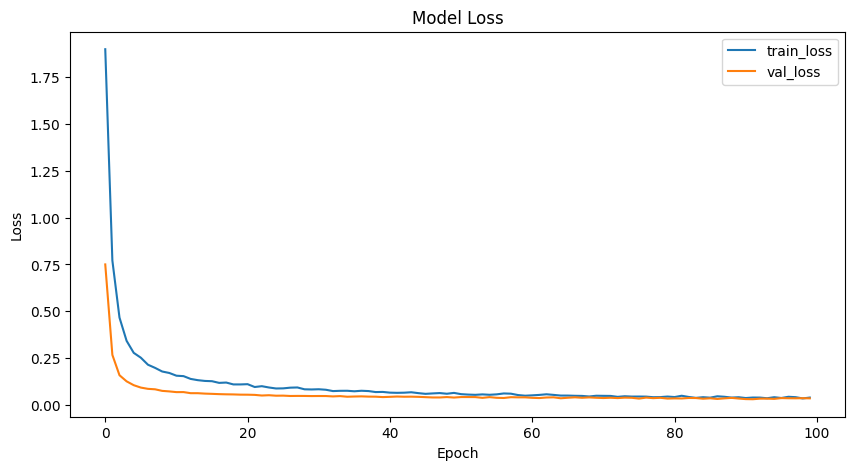

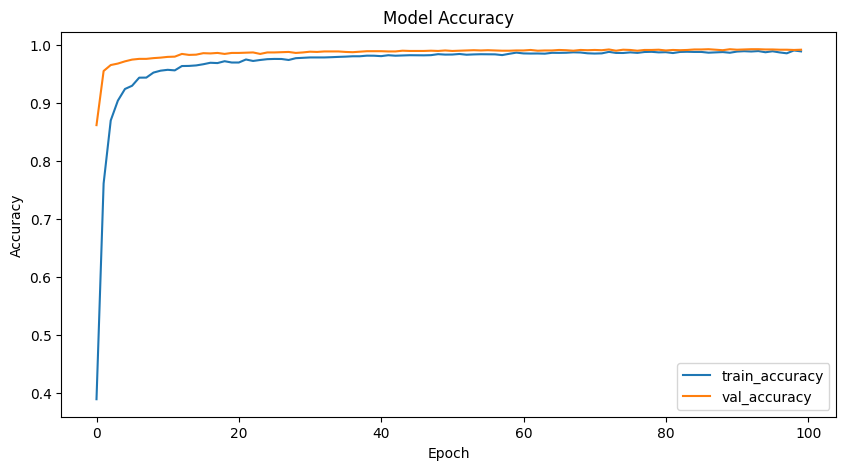

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
